In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import seaborn as sns

Using TensorFlow backend.


In [2]:
(xtr,ytr),(xts,yts) = mnist.load_data()

In [3]:
y_true=yts

In [4]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')

xtr shape:(60000, 28, 28)
ytr shape:(60000,)


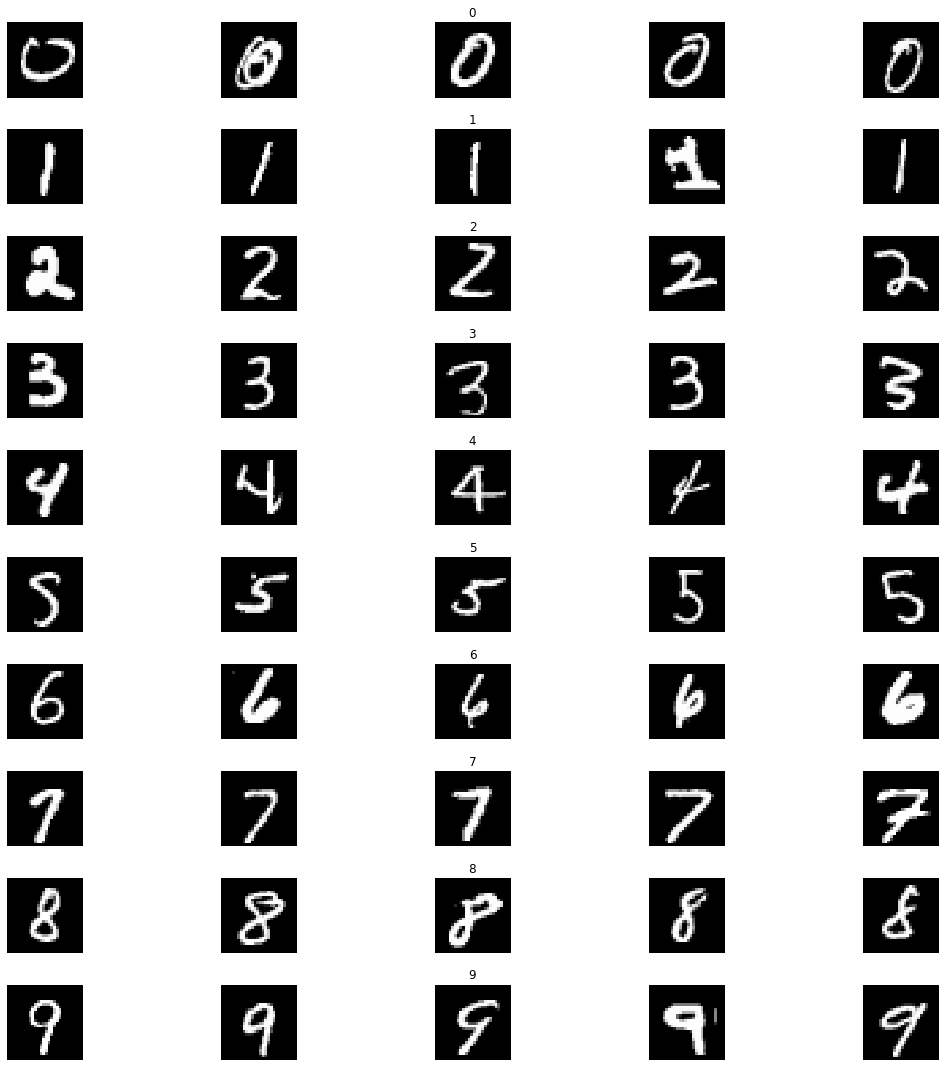

In [5]:
n_cols = 5
n_classes = 10
fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(15,15))
fig.tight_layout()
for i in range(n_cols):
    for j in range(n_classes):
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i==2:
            axes[j][i].set_title(str(j))

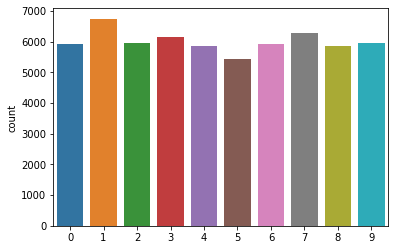

In [6]:
sns.countplot(ytr)
plt.show()

# Pre-processing

In [7]:
xtr = xtr.reshape(xtr.shape[0],28,28,1)
xtr = xtr/255


In [8]:
xts = xts.reshape(xts.shape[0],28,28,1)
xts = xts/255

# OneHot Encoding ytr array

In [9]:
from keras.utils.np_utils import to_categorical
ytr=to_categorical(ytr,10) #10 represents number of classes/categories 
yts= to_categorical(yts,10)

In [10]:
ytr.shape

(60000, 10)

# Creating neural net model

In [11]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers.convolutional import Conv2D ,MaxPooling2D
from keras.optimizers import Adam

In [31]:
def create_model():
    model = Sequential()
    model.add(Conv2D(40,kernel_size=(5,5),input_shape = (28,28,1),activation = 'relu'))
    model.add(Conv2D(32,(5,5),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 40)        1040      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 32)        32032     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               819456    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 855,098
Trainable params: 855,098
Non-trainable params: 0
________________________________________________

In [32]:
h = model.fit(xtr,ytr,epochs=10,verbose=1,validation_data=(xts,yts),batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.1120 - accuracy: 0.9654 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 2/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0375 - accuracy: 0.9888 - val_loss: 0.0325 - val_accuracy: 0.9892
Epoch 3/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0505 - val_accuracy: 0.9854
Epoch 4/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 5/10
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0134 - accuracy: 0.9952 - val_loss: 0.0421 - val_accuracy: 0.9895
Epoch 6/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0454 - val_accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 168s

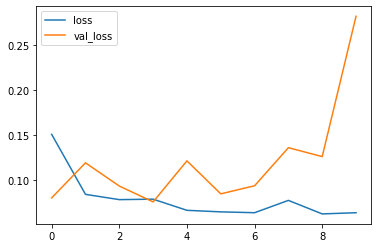

In [24]:
plt.plot(h.history['loss'],label='loss')  #val_loss decreasing = overfitted , val_loss increasing = underfitted
plt.plot(h.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

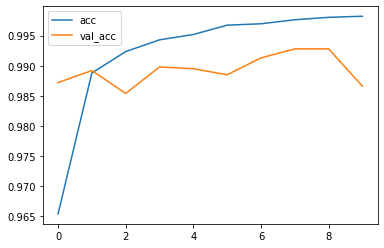

In [33]:
plt.plot(h.history['accuracy'],label='acc')  #val_loss decreasing = overfitted , val_loss increasing = underfitted
plt.plot(h.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()

# Predicting images

In [34]:
import cv2

In [35]:
img=cv2.imread(r"C:\Users\amanv\Documents\ai&mlclass\Datasets\digit.png")

In [36]:
img.shape

(389, 385, 3)

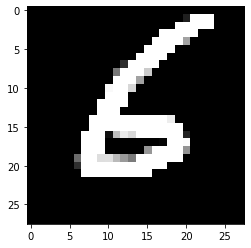

In [37]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [38]:
img = img.reshape(1,28,28,1)
img = img/255

In [39]:
model.predict_classes(img)

array([6], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(xts)
print(confusion_matrix(y_true,y_pred))